# ML Assignment 05 - K-Nearest Neighbors

Problem Statement: <br>
Implement K-Nearest Neighbors algorithm on diabetes.csv dataset. <br>
Compute confusion matrix, accuracy, error rate, precision and recall on the given dataset. <br>
Dataset link : https://www.kaggle.com/datasets/abdallamahgoub/diabetes

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("./diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
data.shape

(768, 9)

In [4]:
data.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [5]:
x = data.drop('Outcome', axis=1)
y = data['Outcome']

In [6]:
x.shape

(768, 8)

In [7]:
y.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

# Feature Scaling

In [8]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x = scaler.fit_transform(x)

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.25)

In [10]:
x_train.shape

(576, 8)

In [11]:
x_test.shape

(192, 8)

# KNN

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)

In [13]:
knn.fit(x_train, y_train)

KNeighborsClassifier()

In [14]:
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

In [15]:
y_pred = knn.predict(x_test)

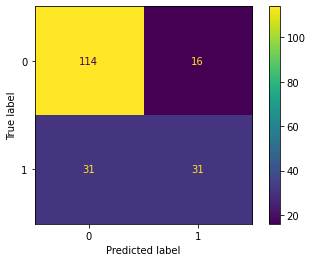

In [16]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [17]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.88      0.83       130
           1       0.66      0.50      0.57        62

    accuracy                           0.76       192
   macro avg       0.72      0.69      0.70       192
weighted avg       0.75      0.76      0.75       192



In order to increase the accuracy, we will find the value of k for which error is minimum

In [18]:
error = []
for k in range(1,41):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    pred = knn.predict(x_test)
    error.append(np.mean(pred != y_test))

In [19]:
error

[0.328125,
 0.2708333333333333,
 0.24479166666666666,
 0.2708333333333333,
 0.24479166666666666,
 0.2552083333333333,
 0.234375,
 0.24479166666666666,
 0.21875,
 0.24479166666666666,
 0.22916666666666666,
 0.22916666666666666,
 0.22395833333333334,
 0.234375,
 0.23958333333333334,
 0.21875,
 0.21354166666666666,
 0.22916666666666666,
 0.22916666666666666,
 0.22395833333333334,
 0.21875,
 0.22395833333333334,
 0.22395833333333334,
 0.22916666666666666,
 0.234375,
 0.22916666666666666,
 0.22395833333333334,
 0.21875,
 0.22395833333333334,
 0.21354166666666666,
 0.22395833333333334,
 0.22916666666666666,
 0.20833333333333334,
 0.22916666666666666,
 0.22916666666666666,
 0.234375,
 0.22395833333333334,
 0.22916666666666666,
 0.22395833333333334,
 0.22395833333333334]

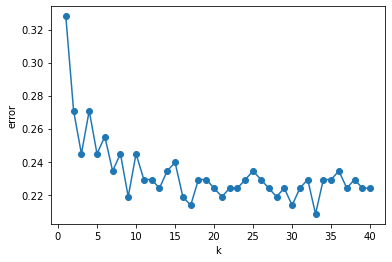

In [20]:
plt.xlabel('k')
plt.ylabel('error')
plt.plot(range(1,41), error, marker='o')

In [21]:
min_error = min(error)
min_error_k = error.index(min_error)
min_error_k+1

# 0-based indexing
# hence optimal value of k = 33

33

In [31]:
knn = KNeighborsClassifier(n_neighbors=33)
knn.fit(x_train, y_train)
y_pred = knn.predict(x_test)

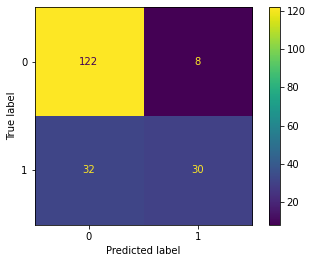

In [32]:
ConfusionMatrixDisplay.from_predictions(y_test, y_pred)

In [33]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.79      0.94      0.86       130
           1       0.79      0.48      0.60        62

    accuracy                           0.79       192
   macro avg       0.79      0.71      0.73       192
weighted avg       0.79      0.79      0.78       192

